Calcul des nombres premiers jusqu’à 10000000
664579 nombres premiers trouvés.


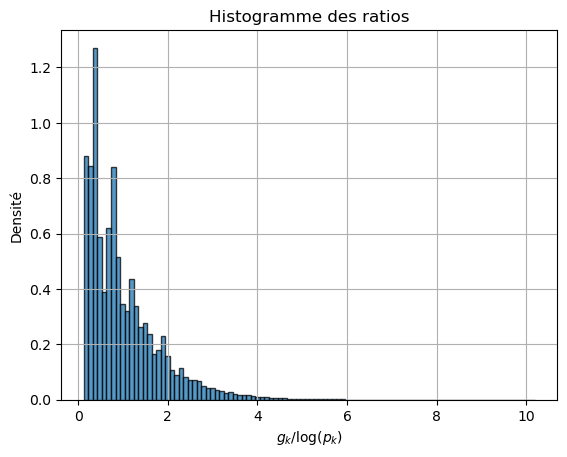

Espérance empirique des ratios : 1.0005134362776378


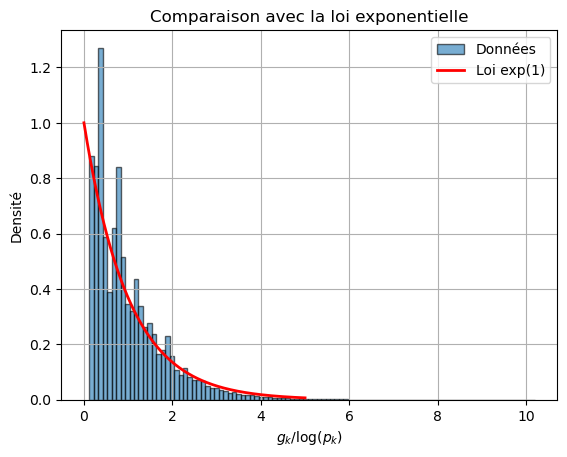

Temps total : 9.589634418487549 secondes
Maintenant, on va étendre et afficher pour 10*8
Calcul des nombres premiers jusqu’à 100000000
5761455 nombres premiers trouvés.


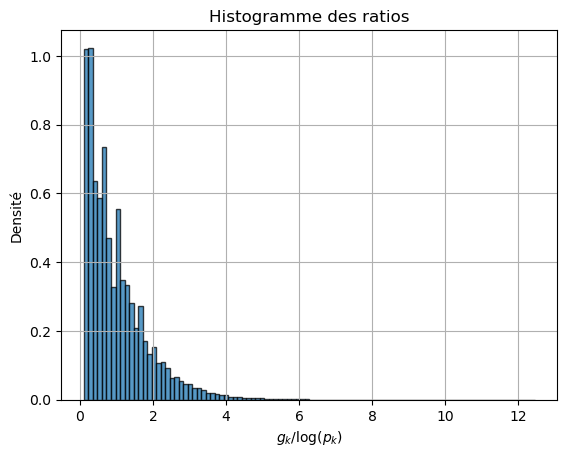

Espérance empirique des ratios : 1.0001312628266628


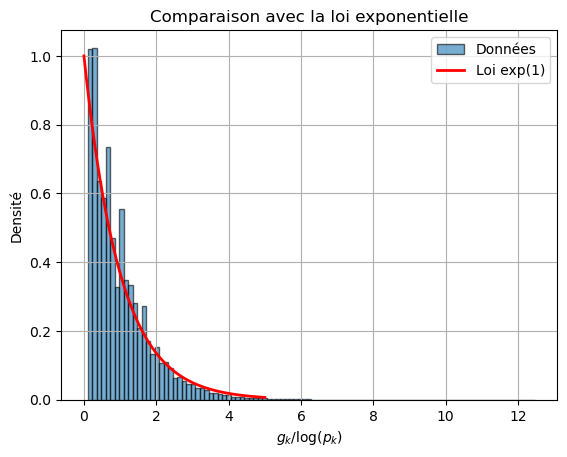

Temps total : 146.51095294952393 secondes


In [23]:
# Exercice 1: Ecart entre les nombres premiers
import numpy as np
from math import isqrt
import matplotlib.pyplot as plt
from numba import njit
from math import log
import time
### Le crible d'Erastothène
def simple_sieve(limit):
    """Crible simple pour générer les petits premiers ≤ sqrt(n)"""
    is_prime = np.ones(limit + 1, dtype=bool)
    is_prime[:2] = False
    for i in range(2, isqrt(limit) + 1):
        if is_prime[i]:
            is_prime[i*i : limit + 1 : i] = False
    return np.flatnonzero(is_prime) ### renvoie les indices du tableau is_prime qui contiennent la valeur True.
### Implémenter un crible segmenté où la longueur du segment est 10*3 et lister les nombres premiers 
def segmented_sieve(n, segment_size=10**3): 
    """Crible segmenté jusqu’à n, par blocs de segment_size"""
    limit = isqrt(n)
    small_primes = simple_sieve(limit)
    primes = []

    for low in range(2, n + 1, segment_size):
        high = min(low + segment_size - 1, n)
        is_prime = np.ones(high - low + 1, dtype=bool)

        for p in small_primes:
            # Trouve le premier multiple de p dans [low, high]
            start = max(p*p, ((low + p - 1) // p) * p)
            for multiple in range(start, high + 1, p):
                is_prime[multiple - low] = False

        # Ajoute les nombres premiers trouvés dans ce segment
        for i in range(low, high + 1):
            if is_prime[i - low]:
                primes.append(i)

    return np.array(primes)
### Calcul des écarts g_k et des ratios g_k / log(p_k)
def gaps_ratios(primes):
    pk = primes[:-1]
    pk1 = primes[1:]
    gaps = pk1 - pk
    ratios = gaps / np.log(pk)
    return pk, gaps, ratios
### Histogramme des ratios et espérance empirique
def plot_histogram(ratios, bins=100):
    plt.hist(ratios, bins=bins, density=True, alpha=0.75, edgecolor='black')
    plt.xlabel(r"$g_k / \log(p_k)$")
    plt.ylabel("Densité")
    plt.title("Histogramme des ratios")
    plt.grid(True)
    plt.show()
    print("Espérance empirique des ratios :", np.mean(ratios))
### Etendre jusqu'à 10^8 si possible
def run(limit):
    start = time.time()
    print(f"Calcul des nombres premiers jusqu’à {limit}")
    primes = segmented_sieve(limit)
    print(f"{len(primes)} nombres premiers trouvés.")
    ### appel des fonctions###
    pk, gaps, ratios = gaps_ratios(primes)
    plot_histogram(ratios)
### Conjecturer la loi limite des écarts avec la distribution exponentielle (paramètre 1)
    from scipy.stats import expon
    x = np.linspace(0, 5, 200)
    plt.hist(ratios, bins=100, density=True, alpha=0.6, label="Données", edgecolor='black')
    plt.plot(x, expon.pdf(x), 'r-', lw=2, label="Loi exp(1)")
    plt.xlabel(r"$g_k / \log(p_k)$")
    plt.ylabel("Densité")
    plt.title("Comparaison avec la loi exponentielle")
    plt.legend()
    plt.grid(True)
    plt.show()
    print("Temps total :", time.time() - start, "secondes")

# Lancer le programme pour 10*7 et afficher le temps d'execution,l'histogramme des ratios et la superposition avec une densité exponentielle
run(10**7)
print("Maintenant, on va étendre et afficher pour 10*8")
#Comparons la convergence pour 10*8 et afficher le temps de calcul,l'histogramme des ratios et la superposition avec une densité exponentielle
run(10**8)